In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import subprocess

import common

def plot_kernels():
    # get a list of all kernels   
    kernels=df.reset_index()["kernel"].unique()
    colors=["green", "blue", "red"]

    for i in range(len(kernels)):
    kernel_data = df.xs(kernels[i], level=1,  drop_level=False).reset_index()
    plt.plot(kernel_data["n_rays"], kernel_data["Rps"], color=colors[i])


    plt.legend(kernels)
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()


# Comparison OpenVDB vs. NanoVDB opn CPU vs NanoVDB on GPU

kernel
OpenVDB         11.8479
NanoVDB_CPU     16.3431
NanoVDB_GPU    156.1130
Name: MRps, dtype: float64


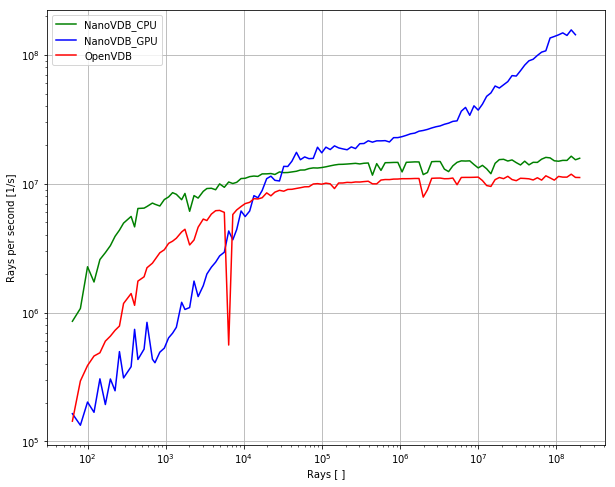

In [29]:
df = common.load_df("../data/2022-04-05_22-31-00_Xeon_6248_Tesla_T4.csv")
plt.rcParams["figure.figsize"] = (10, 8)
plot_kernels(df)


print(df.groupby("kernel").max()["MRps"].sort_values())
plt.show()

Problem:

- Benchmark broke after 198.190.084 Rays (ca. 200M) 
- Next step would have been 224.507.359 (ca. 224M)
- Kernel Memory requirements (measured with sizeof()):
    - Input: Ray = 56B
    - Output: Coord = 12B (3x float)
    - Output: time = 4B (1x float)

- => Memory required per Ray 72B
- 200M Rays = 14.4 GB
- 224M Rays = 16.1 GB
- Tesla T4 has 16 GB


Note:
- Ray should consist of 2x Vec3f = 6 float = 24B => $\approx$ 47% overhead



# Load Factor

kernel
NanoVDB_GPU    457.069
Name: MRps, dtype: float64


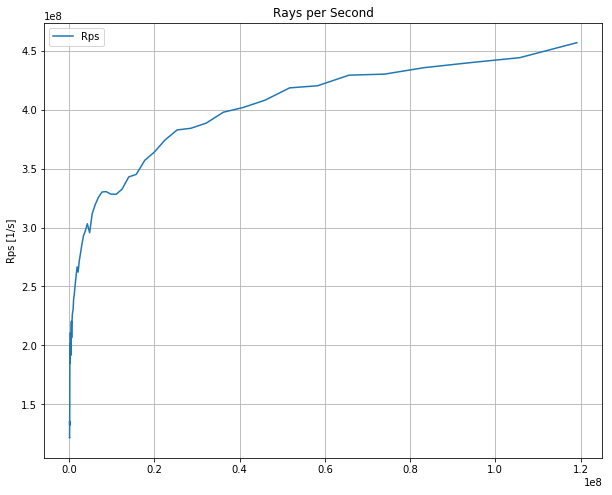

In [18]:
plt.rcParams["figure.figsize"] = (10, 8)

df = common.load_df("../data/2022-04-07_22-29-16_gpu_short_name_loadfactor_50.csv").reset_index()

plt.plot(df["n_rays"], df["Rps"])
plt.legend()
plt.grid()
# plt.yscale("log")
# plt.xscale("log")
plt.ylabel("Rps [1/s]")
plt.title("Rays per Second")


print(df.groupby("kernel").max()["MRps"].sort_values())
plt.show()


# Ray Shuffling

kernel
OpenVDB        17.2963
NanoVDB_CPU    26.9774
NanoVDB_GPU    99.2817
Name: MRps, dtype: float64


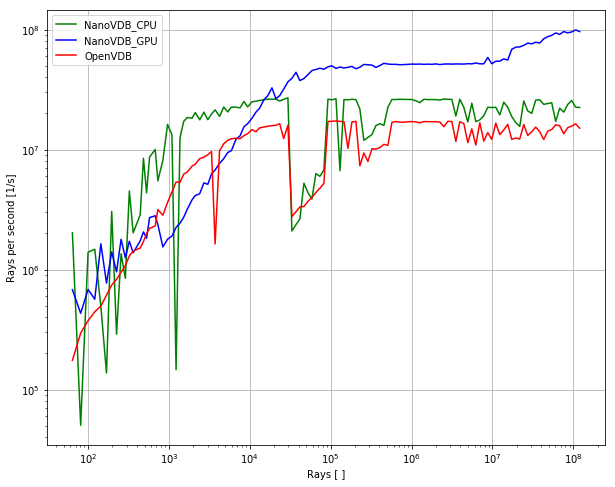

In [30]:
df = common.load_df("../data/2022-04-07_23-07-51_gpu_short_name_loadfactor_1_shuffled.csv")
plot_kernels(df)



print(df.groupby("kernel").max()["MRps"].sort_values())
plt.show()

# Sphere offset


kernel
OpenVDB         22.5633
NanoVDB_CPU     34.4333
NanoVDB_GPU    179.0200
Name: MRps, dtype: float64


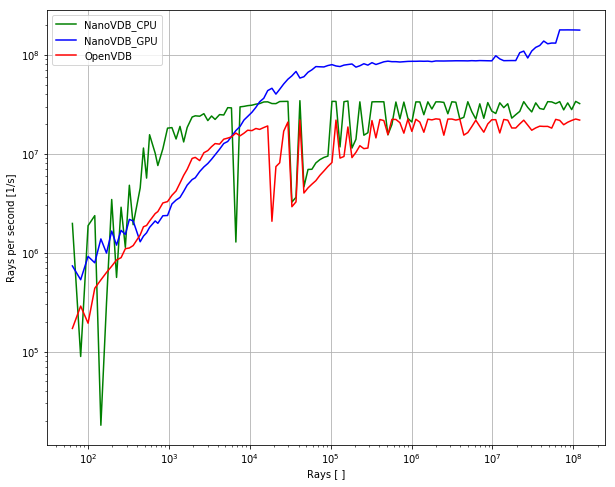

In [31]:
df = common.load_df("../data/2022-04-07_23-52-28_gpu_short_name_loadfactor_1_offset_shuffled.csv")
plot_kernels(df)



print(df.groupby("kernel").max()["MRps"].sort_values())
plt.show()

# With load factor again:
- Shuffling
- No checks
- Load factor = 100
- better level set params
- sphere offset = 2


Speedup OpenVDB -> NanoVDB = 6.34
kernel
OpenVDB         18.5132
NanoVDB_CPU     29.6971
NanoVDB_GPU    117.4190
Name: MRps, dtype: float64


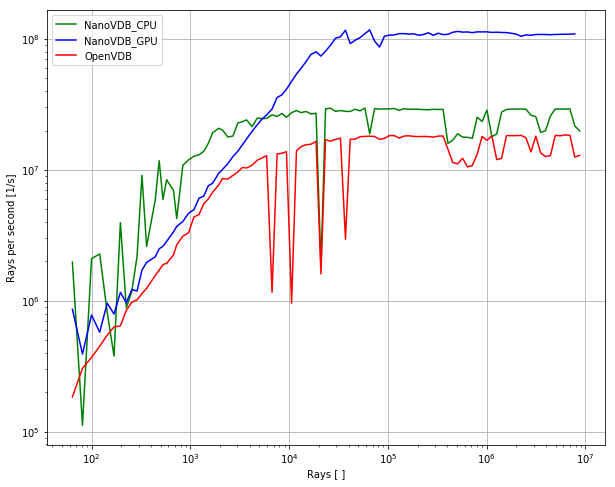

In [42]:
df = common.load_df("../data/2022-04-08_01-00-21_gpu_short_name_loadfactor_100_shuffling.csv")
plot_kernels(df)

best = df.groupby("kernel").max()["MRps"].sort_values()
print(f"Speedup OpenVDB -> NanoVDB = {best['NanoVDB_GPU'] / best['OpenVDB']:.3}")
print(best)
plt.show()


# Same as above but no shuffle


Speedup OpenVDB -> NanoVDB = 19.0
kernel
OpenVDB         20.3086
NanoVDB_CPU     32.1388
NanoVDB_GPU    386.0970
Name: MRps, dtype: float64


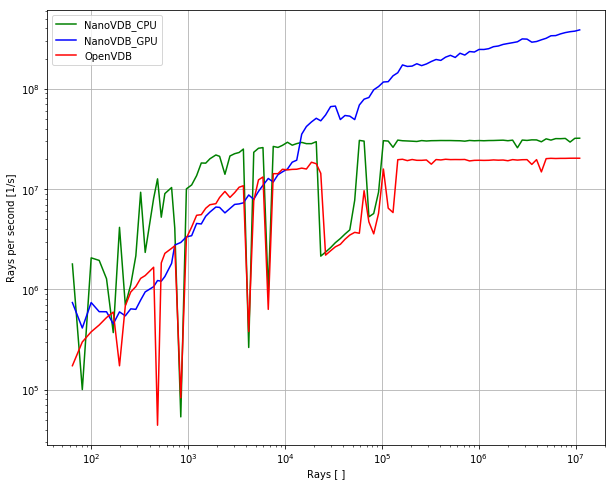

In [48]:
df = common.load_df("../build/2022-04-08_01-02-54_gpu_short_name_loadfactor_100.csv")
plot_kernels(df)

best = df.groupby("kernel").max()["MRps"].sort_values()
print(f"Speedup OpenVDB -> NanoVDB = {best['NanoVDB_GPU'] / best['OpenVDB']:.3}")
print(best)
plt.show()
